In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

# Load Dataset and Minimal Cleaning

In [3]:
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [4]:
old_df = pd.read_csv("/Users/sky/src/HowlandLab/data/target_grid_search.csv")
df = old_df.copy(deep = True)
df = df.dropna()
df

,Unnamed: 0,marker,nx,ny,filter,filterFactor,useCorrection,CT_prime,turbulence,mean_CT,...,variance_Cp,std_CT,std_an,std_Cp,skewness_CT,skewness_an,skewness_Cp,kurtosis_CT,kurtosis_an,kurtosis_Cp
0,0,o,64.0,32.0,0.589831,1.000,True,1.0,False,0.653387,...,3.197882e-12,1.472572e-06,9.108791e-07,1.785475e-06,3.114115,-3.114112,3.114117,9.390863,9.390842,9.390885
1,1,o,128.0,64.0,0.294915,1.000,True,1.0,False,0.669815,...,7.861220e-12,2.282117e-06,1.394218e-06,2.801602e-06,-0.121881,0.121894,-0.121868,3.161778,3.161781,3.161775
2,2,o,256.0,128.0,0.147458,1.000,True,1.0,False,0.644266,...,6.806981e-13,6.849901e-07,4.266991e-07,8.247230e-07,-0.367102,0.367104,-0.367100,0.398371,0.398372,0.398369
3,3,o,64.0,32.0,0.080000,0.136,True,1.0,False,0.703096,...,1.359172e-11,2.926576e-06,1.745104e-06,3.680949e-06,2.864592,-2.864584,2.864601,8.871645,8.871581,8.871710
4,4,o,128.0,64.0,0.080000,0.271,True,1.0,False,0.688967,...,3.867314e-10,1.578250e-05,9.507068e-06,1.965017e-05,-0.071558,0.071595,-0.071521,0.155124,0.155125,0.155123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,^,256.0,128.0,0.147458,1.000,True,4.0,False,1.080812,...,9.515091e-05,1.250796e-02,3.007770e-03,9.753024e-03,0.015113,-0.010504,0.019721,-1.468827,-1.468921,-1.468687
114,114,^,256.0,128.0,0.221187,1.500,False,4.0,False,1.123330,...,3.807397e-05,7.761569e-03,1.830868e-03,6.169456e-03,-0.022114,0.025206,-0.019023,-1.403042,-1.402528,-1.403530
115,115,^,256.0,128.0,0.368644,2.500,True,4.0,False,1.076953,...,1.615180e-05,5.163143e-03,1.243908e-03,4.018309e-03,-0.057736,0.060468,-0.055007,-1.237577,-1.236497,-1.238636
116,116,s,320.0,128.0,0.135316,1.000,False,1.0,True,0.746364,...,5.576546e-01,5.589355e-01,3.501013e-01,7.466967e-01,0.315177,0.007151,0.566344,-1.430128,-1.497915,-1.221217


In [5]:
old_df = pd.read_csv("/Users/sky/src/HowlandLab/data/target_grid_search.csv")
df = old_df.copy(deep = True)
df = df.dropna()
# add in new columns of ease of use
df['Movement'] = df.apply(lambda row: ("Stationary" if row.marker == "o" else ("Surging" if row.marker == "s" else "Pitching")), axis = 1)
df["Resolution (ny)"] = df["ny"].astype(str)
df["h"] = df.apply(lambda row: round(math.sqrt((25/row.nx)**2 + 2 * (10/row.ny)**2), ndigits = 2), axis = 1)
df["f"] = df.apply(lambda row: math.trunc(row.filterFactor*10) / 10, axis = 1)
# remove unneeded columns/values
cols_to_keep = ["Movement", "Resolution (ny)", "filterFactor", "f", "useCorrection", "turbulence", "CT_prime"]
df = df.drop_duplicates(subset = cols_to_keep, keep = 'last')

In [6]:
def get_movement(df, type_str):
    return df[df["Movement"] == type_str]
def get_stationary(df):
    return get_movement(df, "Stationary")
def get_surging(df):
    return get_movement(df, "Surging")
def get_pitching(df):
    return get_movement(df, "Pitching")

In [7]:
def get_mean(df):
    return df[cols_to_keep + ["mean_CT", "mean_an", "mean_Cp"]]
def get_std(df):
    return df[cols_to_keep + ["std_CT", "std_an", "std_Cp"]]
def get_skew(df):
    return df[cols_to_keep + ["skewness_CT", "skewness_an", "skewness_Cp"]]
def get_kurtosis(df):
    return df[cols_to_keep + ["kurtosis_CT", "kurtosis_an", "kurtosis_Cp"]]

In [8]:
mean_df = get_mean(df)
std_df = get_std(df)
skew_df = get_skew(df)
kurtosis_df = get_kurtosis(df)

# Plot Dataset Basics

In [9]:
def analytical_a(CT):
    # note that CT is actually CT'
    return CT / (4 + CT)

def a_to_Cp(a, alg = "classical"):
    return 4 * a * (1 - a)**2

In [10]:
def add_reference_lines(axes, ctp_vals, analytical_an, analytical_ct, analytical_cp, label, color):
    ((ax0, ax1), (ax2, ax3)) = axes
    sns.lineplot(ax = ax0, x = analytical_an, y = analytical_ct, color = color, label = label)
    sns.lineplot(ax = ax1, x = ctp_vals, y = analytical_ct, color = color)
    sns.lineplot(ax = ax2, x = analytical_an, y = analytical_cp, color = color)
    sns.lineplot(ax = ax3, x = ctp_vals, y = analytical_cp, color = color)
    return

In [11]:
def four_plot_layout(df, CT_key, an_key, Cp_key, classical = False, pitch = False, surge = False, title = "", ax_label_type = "", fill_between = False, **kwargs):
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    ((ax0, ax1), (ax2, ax3)) = axes

    sns.scatterplot(ax = ax0, data = df, x = an_key, y = CT_key, legend = True, **kwargs)
    sns.scatterplot(ax = ax1, data = df, x = "CT_prime", y = CT_key, legend = False, **kwargs)
    sns.scatterplot(ax = ax2, data = df, x = an_key, y = Cp_key, legend = False, **kwargs)
    sns.scatterplot(ax = ax3, data = df, x = "CT_prime", y = Cp_key, legend = False, **kwargs)

    ctp_vals = np.linspace(0.75, 6.25, 50)
    analytical_an = [analytical_a(ctp) for ctp in ctp_vals]
    analytical_ct = [ctp * (1 - analytical_an[i])**2 for (i, ctp) in enumerate(ctp_vals)]
    analytical_cp = [a_to_Cp(a) for a in analytical_an]
    if classical:
        # classical momentum values for statinary turbine
        label = "Classical"
        color = "k"
        add_reference_lines(axes, ctp_vals, analytical_an, analytical_ct, analytical_cp, label, color)
    if surge:
            s = 0.5
            surge_cp = [cp * (1 + (3 * s **2) / 2) for cp in analytical_cp]
            label = "Johlas (Surge)"
            color = "b"
            add_reference_lines(axes, ctp_vals, analytical_an, analytical_ct, surge_cp, label, color)
    if pitch:
            ps = [np.cos(5 * np.pi / 180 * np.sin(x))**3 for x in np.linspace(0, 2 * np.pi, 250)]
            pitch_cp = [cp * np.mean(ps) for cp in analytical_cp]
            label = "Johlas (Pitch)"
            color = "g"
            add_reference_lines(axes, ctp_vals, analytical_an, analytical_ct, pitch_cp, label, color)

    if fill_between:
        mean_of_ct_vals = df.groupby('CT_prime')[CT_key].mean()
        std_of_ct_vals = df.groupby('CT_prime')[CT_key].std()
        ax1.fill_between(mean_of_ct_vals.index, mean_of_ct_vals + std_of_ct_vals, mean_of_ct_vals - std_of_ct_vals, color='grey', alpha=0.2)
        mean_of_cp_vals = df.groupby('CT_prime')[Cp_key].mean()
        std_of_cp_vals = df.groupby('CT_prime')[Cp_key].std()
        ax3.fill_between(mean_of_cp_vals.index, mean_of_cp_vals + std_of_cp_vals, mean_of_cp_vals - std_of_cp_vals, color='grey', alpha=0.2)


    fig.suptitle(title)
    ax0.set(xlabel = "", ylabel=ax_label_type + ' $C_T$')
    ax1.set(xlabel = "", ylabel = "")
    ax2.set(ylabel= ax_label_type + ' $C_p$', xlabel= ax_label_type + ' $a_n$')
    ax3.set(xlabel= '$C_T\'$', ylabel = "")

    leg = ax0.legend()
    bb = leg.get_bbox_to_anchor().transformed(ax0.transAxes.inverted())
    xOffset = 1.7
    bb.x0 += xOffset
    bb.x1 += xOffset
    leg = leg.set_bbox_to_anchor(bb, transform = ax0.transAxes)
    return fig, axes

# Plot All Data

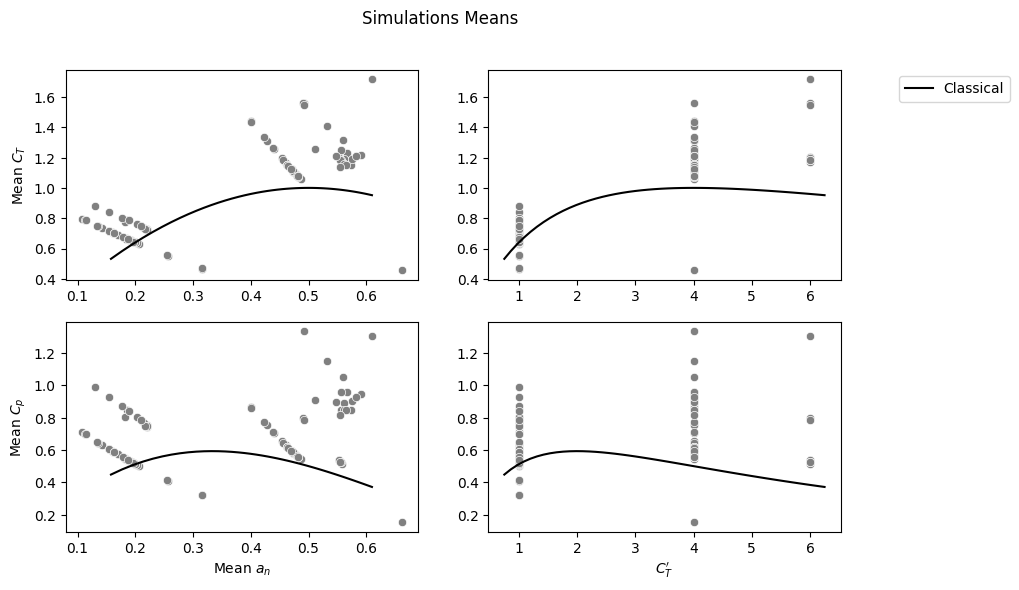

In [12]:
fig, ax = four_plot_layout(df, "mean_CT", "mean_an", "mean_Cp", color ="grey", title = "Simulations Means", ax_label_type = "Mean", classical = True);

# Plot Data by Movement

In [13]:
palette = "viridis_r"
alpha = 0.7

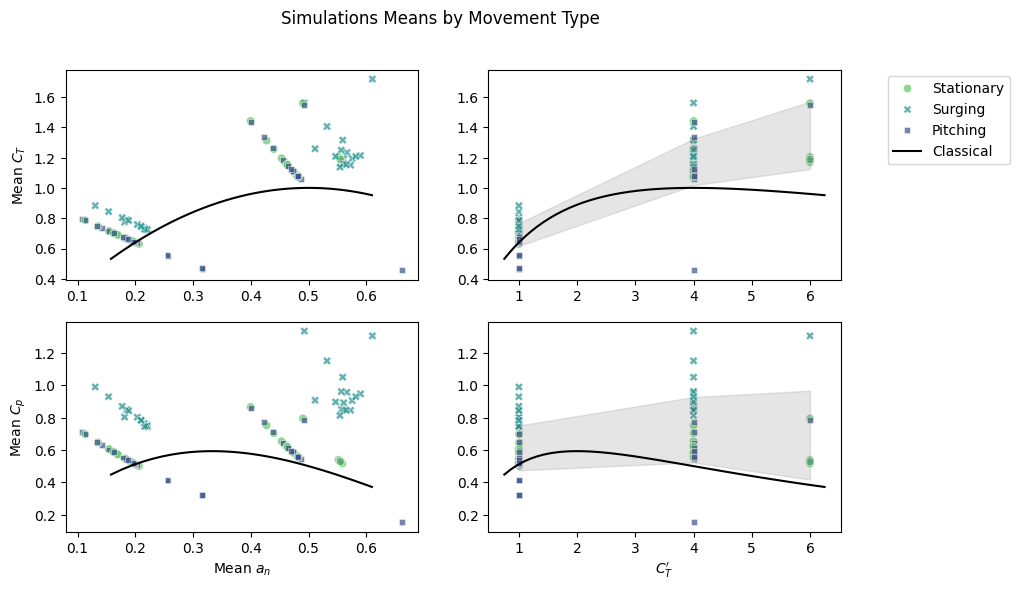

In [14]:
fig, axes = four_plot_layout(df, "mean_CT", "mean_an", "mean_Cp", color ="grey", title = "Simulations Means by Movement Type", ax_label_type = "Mean", hue = "Movement", style = "Movement", palette = palette, alpha = alpha, fill_between= True, classical = True);

## Plot Data by Resolution

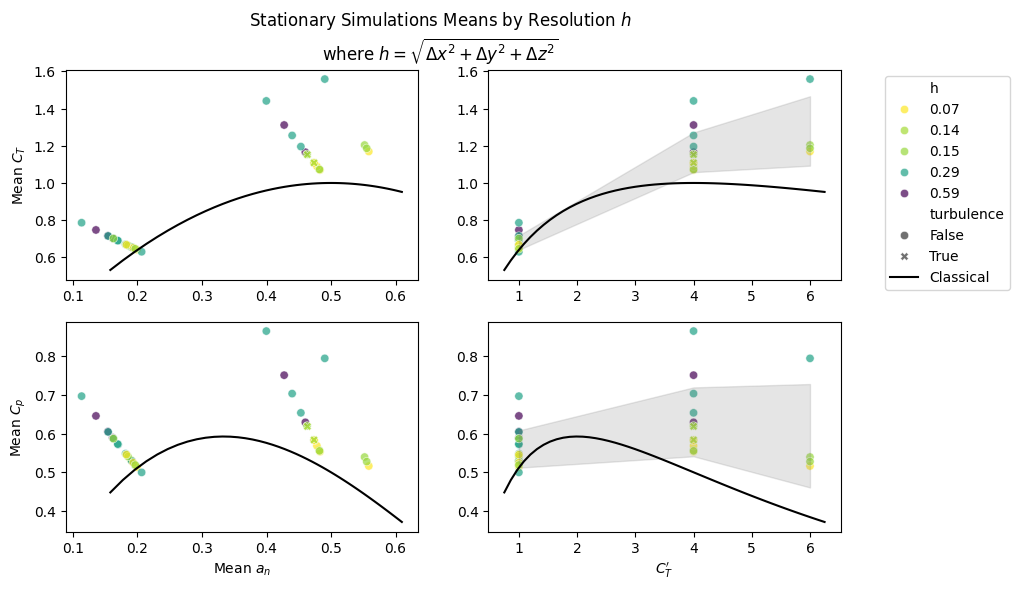

In [15]:
four_plot_layout(get_stationary(df), "mean_CT", "mean_an", "mean_Cp", title =  "Stationary Simulations Means by Resolution $h$\nwhere $h = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}$", ax_label_type = "Mean", hue = "h", style = "turbulence", palette = palette, alpha = alpha, fill_between=True, classical = True );

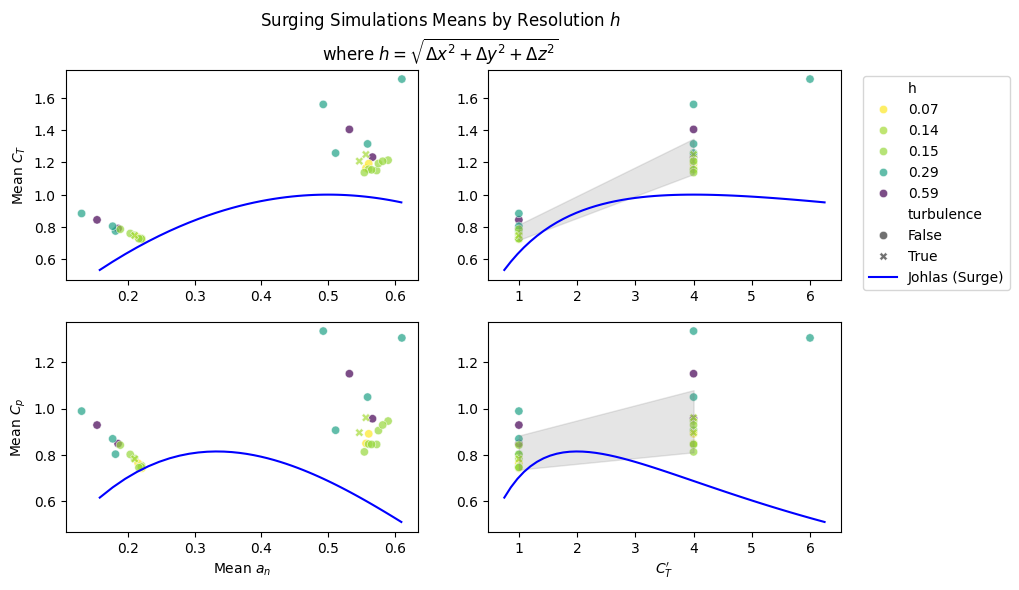

In [16]:
four_plot_layout(get_surging(df), "mean_CT", "mean_an", "mean_Cp", title =  "Surging Simulations Means by Resolution $h$\nwhere $h = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}$", ax_label_type = "Mean", hue = "h", style = "turbulence", palette = palette, alpha = alpha, fill_between=True, surge = True);

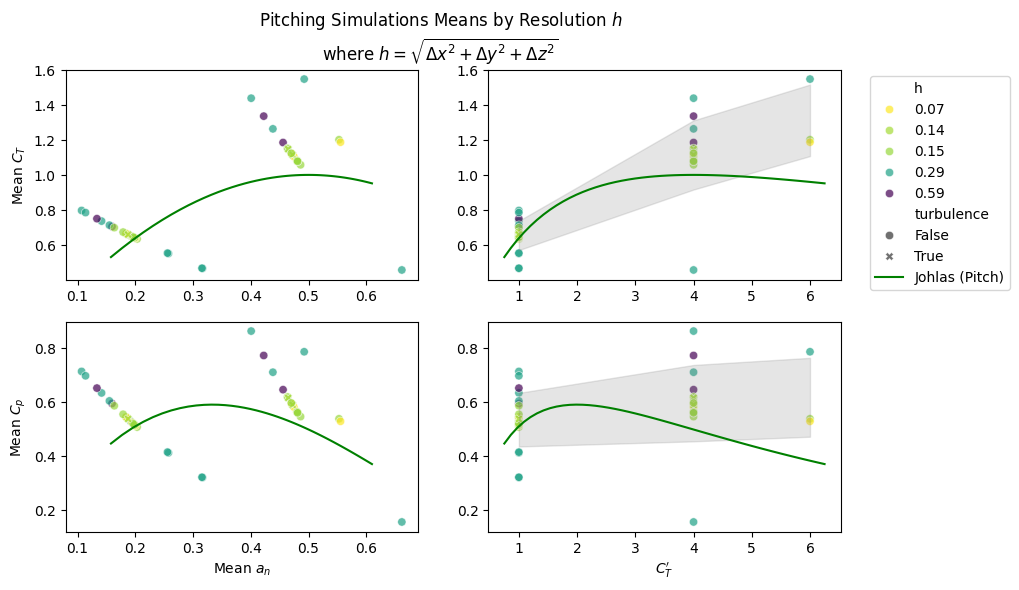

In [17]:
four_plot_layout(get_pitching(df), "mean_CT", "mean_an", "mean_Cp", title =  "Pitching Simulations Means by Resolution $h$\nwhere $h = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}$", ax_label_type = "Mean", hue = "h", style = "turbulence", palette = palette, alpha = alpha, fill_between=True, pitch = True);

At this point, I feel it is safe to drop the two coarsest resolutions, as they fall outside of the standard deviation of the means of $C_p$ and $C_T$. Thus we only keep resolutions that are $h < 0.25$.

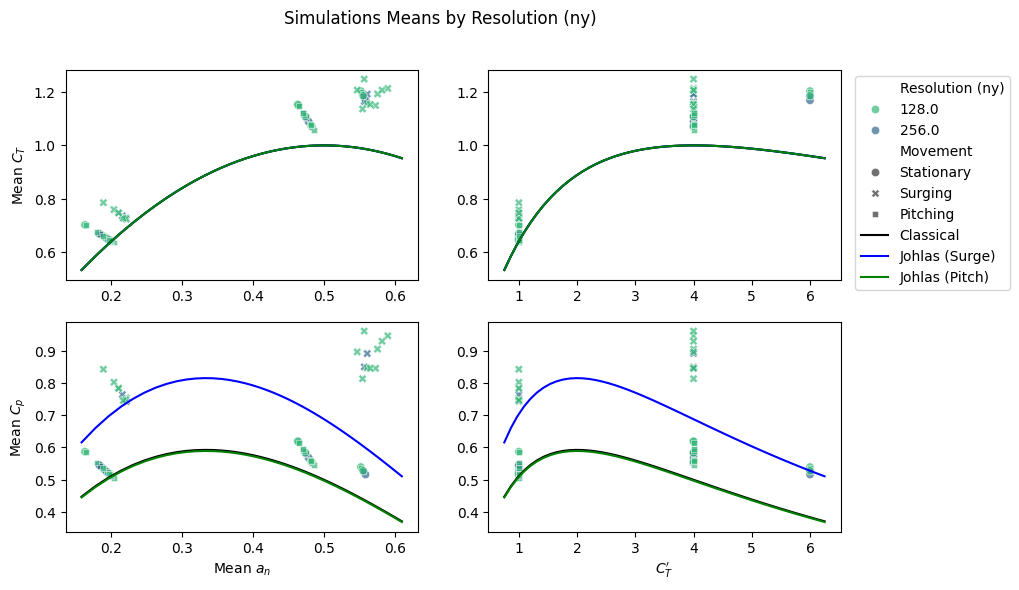

In [18]:
high_res_df = df[df["h"] < 0.25]
four_plot_layout(high_res_df, "mean_CT", "mean_an", "mean_Cp", title = "Simulations Means by Resolution (ny)", ax_label_type = "Mean", hue = "Resolution (ny)", style = "Movement", alpha = alpha, palette = palette, classical = True, surge=True, pitch=True);

In [19]:
high_res_df

,Unnamed: 0,marker,nx,ny,filter,filterFactor,useCorrection,CT_prime,turbulence,mean_CT,...,skewness_CT,skewness_an,skewness_Cp,kurtosis_CT,kurtosis_an,kurtosis_Cp,Movement,Resolution (ny),h,f
2,2,o,256.0,128.0,0.147458,1.000,True,1.0,False,0.644266,...,-0.367102,0.367104,-0.367100,0.398371,0.398372,0.398369,Stationary,128.0,0.15,1.0
5,5,o,256.0,128.0,0.080000,0.543,True,1.0,False,0.645839,...,-0.076669,0.076674,-0.076664,-0.090234,-0.090232,-0.090235,Stationary,128.0,0.15,0.5
6,6,o,512.0,256.0,0.080000,1.085,True,1.0,False,0.641215,...,-0.015104,0.015112,-0.015096,-0.656862,-0.656858,-0.656866,Stationary,256.0,0.07,1.0
9,9,o,256.0,128.0,0.080000,0.543,False,1.0,False,0.656298,...,1.006623,-1.006613,1.006632,1.076518,1.076495,1.076541,Stationary,128.0,0.15,0.5
17,17,o,256.0,128.0,0.080000,0.543,True,4.0,False,1.075189,...,-0.457642,0.463409,-0.451880,-0.188750,-0.181547,-0.195865,Stationary,128.0,0.15,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,^,256.0,128.0,0.147458,1.000,True,4.0,False,1.080812,...,0.015113,-0.010504,0.019721,-1.468827,-1.468921,-1.468687,Pitching,128.0,0.15,1.0
114,114,^,256.0,128.0,0.221187,1.500,False,4.0,False,1.123330,...,-0.022114,0.025206,-0.019023,-1.403042,-1.402528,-1.403530,Pitching,128.0,0.15,1.5
115,115,^,256.0,128.0,0.368644,2.500,True,4.0,False,1.076953,...,-0.057736,0.060468,-0.055007,-1.237577,-1.236497,-1.238636,Pitching,128.0,0.15,2.5
116,116,s,320.0,128.0,0.135316,1.000,False,1.0,True,0.746364,...,0.315177,0.007151,0.566344,-1.430128,-1.497915,-1.221217,Surging,128.0,0.14,1.0


# Plot Data by Filter Factor

In [20]:
analytical_an = [analytical_a(ctp) for ctp in [1.0, 4.0]]
analytical_cp = [a_to_Cp(a) for a in analytical_an]

def johlas(cp, sf, sa, pa):
    v = (2 * sf * sa) / (1 - np.cos(sf * np.pi))
    x_disp = (1 + (3 * (v**2)) / 2)
    theta_disp = np.mean([np.cos(pa * np.pi / 180 * np.sin(x))**3 for x in np.linspace(0, 2 * np.pi, 250)])
    return cp * x_disp * theta_disp
surge_cp = [johlas(cp, 1.0, 0.5, 0.0) for cp in analytical_cp]
pitch_cp = [johlas(cp, 1.0, 0.0, 5.0) for cp in analytical_cp]


In [21]:
high_res_df

,Unnamed: 0,marker,nx,ny,filter,filterFactor,useCorrection,CT_prime,turbulence,mean_CT,...,skewness_CT,skewness_an,skewness_Cp,kurtosis_CT,kurtosis_an,kurtosis_Cp,Movement,Resolution (ny),h,f
2,2,o,256.0,128.0,0.147458,1.000,True,1.0,False,0.644266,...,-0.367102,0.367104,-0.367100,0.398371,0.398372,0.398369,Stationary,128.0,0.15,1.0
5,5,o,256.0,128.0,0.080000,0.543,True,1.0,False,0.645839,...,-0.076669,0.076674,-0.076664,-0.090234,-0.090232,-0.090235,Stationary,128.0,0.15,0.5
6,6,o,512.0,256.0,0.080000,1.085,True,1.0,False,0.641215,...,-0.015104,0.015112,-0.015096,-0.656862,-0.656858,-0.656866,Stationary,256.0,0.07,1.0
9,9,o,256.0,128.0,0.080000,0.543,False,1.0,False,0.656298,...,1.006623,-1.006613,1.006632,1.076518,1.076495,1.076541,Stationary,128.0,0.15,0.5
17,17,o,256.0,128.0,0.080000,0.543,True,4.0,False,1.075189,...,-0.457642,0.463409,-0.451880,-0.188750,-0.181547,-0.195865,Stationary,128.0,0.15,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,^,256.0,128.0,0.147458,1.000,True,4.0,False,1.080812,...,0.015113,-0.010504,0.019721,-1.468827,-1.468921,-1.468687,Pitching,128.0,0.15,1.0
114,114,^,256.0,128.0,0.221187,1.500,False,4.0,False,1.123330,...,-0.022114,0.025206,-0.019023,-1.403042,-1.402528,-1.403530,Pitching,128.0,0.15,1.5
115,115,^,256.0,128.0,0.368644,2.500,True,4.0,False,1.076953,...,-0.057736,0.060468,-0.055007,-1.237577,-1.236497,-1.238636,Pitching,128.0,0.15,2.5
116,116,s,320.0,128.0,0.135316,1.000,False,1.0,True,0.746364,...,0.315177,0.007151,0.566344,-1.430128,-1.497915,-1.221217,Surging,128.0,0.14,1.0


/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/567509243.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_les_vars = df_les_vars[(df_les_vars["turbulence"] != True) | (df["useCorrection"] != True)]


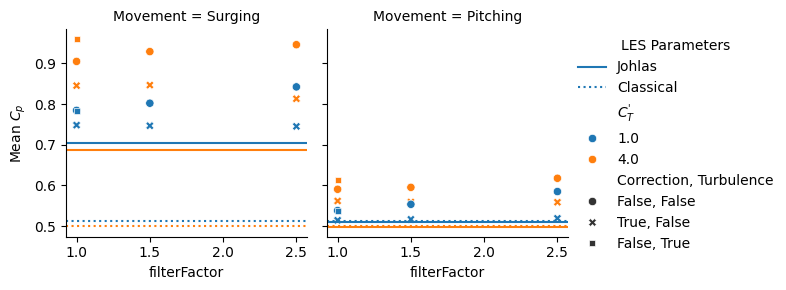

In [22]:
df_les_vars = high_res_df
df_les_vars = df_les_vars[df_les_vars["Movement"] != "Stationary"]
df_les_vars = df_les_vars[(df_les_vars["CT_prime"] < 6) & (df_les_vars["h"] > 0.08)] # want CT' < 4 and 256 x 128 x 128 resolution data
df_les_vars = df_les_vars[(df_les_vars["filterFactor"] < 4) & (df_les_vars["filterFactor"] > 0.6)]
df_les_vars = df_les_vars[(df_les_vars["turbulence"] != True) | (df["useCorrection"] != True)]
i = df_les_vars[((df_les_vars.turbulence) & ( df_les_vars.useCorrection))].index
df_les_vars.drop(i)

style = df_les_vars[['useCorrection', 'turbulence']].apply(
    lambda row: f"{row.useCorrection}, {row.turbulence}", axis=1)
style.name = 'Correction, Turbulence'
hue = df_les_vars["CT_prime"]
hue.name = "$C_T^'$"

palette =['tab:blue', 'tab:orange']
style_order = ["False, False", "True, False", "False, True"]

g = sns.FacetGrid(df_les_vars, col = "Movement")
surge_ax, pitch_ax = g.axes.flat
surge_ax.axhline(y = surge_cp[0], color = palette[0], label = "Johlas")
surge_ax.axhline(y = surge_cp[1], color = palette[1])
pitch_ax.axhline(y = pitch_cp[0], color = palette[0])
pitch_ax.axhline(y = pitch_cp[1], color = palette[1])

surge_ax.axhline(y = analytical_cp[0], color = palette[0], linestyle=':', label = "Classical")
surge_ax.axhline(y = analytical_cp[1], color = palette[1], linestyle=':')
pitch_ax.axhline(y = analytical_cp[0], color = palette[0], linestyle=':', label = "Classical")
pitch_ax.axhline(y = analytical_cp[1], color = palette[1], linestyle=':')
g.map_dataframe(sns.scatterplot, x = "filterFactor", y = "mean_Cp", hue = hue, style = style, style_order = style_order, palette = palette)
g.set_ylabels("Mean $C_p$")

g.add_legend(title = "LES Parameters")

/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/198265264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitch_data["percent_diff_classical"] = pitch_data.apply((lambda row: 100 * (row.mean_Cp - (analytical_cp[0] if row.CT_prime == 1 else analytical_cp[1])) / (analytical_cp[0] if row.CT_prime == 1 else analytical_cp[1])), axis = 1)


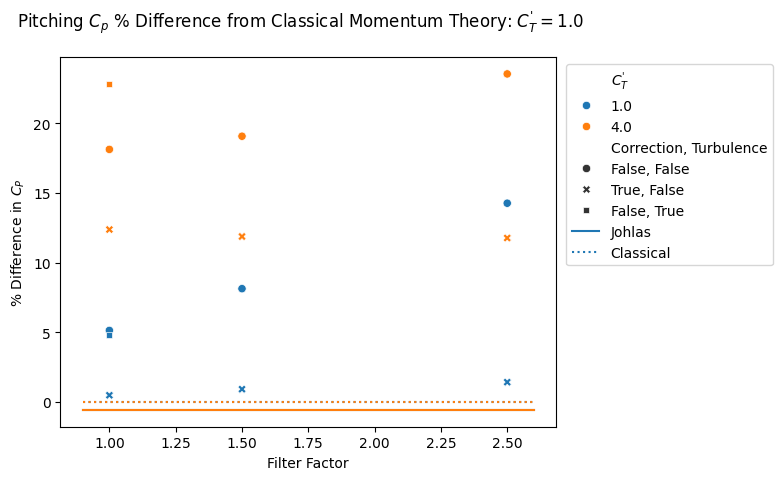

In [23]:
pitch_data = df_les_vars[df_les_vars["Movement"] == "Pitching"]
pitch_data["percent_diff_classical"] = pitch_data.apply((lambda row: 100 * (row.mean_Cp - (analytical_cp[0] if row.CT_prime == 1 else analytical_cp[1])) / (analytical_cp[0] if row.CT_prime == 1 else analytical_cp[1])), axis = 1)

fig, ax = plt.subplots(1, 1)
fig.suptitle("Pitching $C_p$ % Difference from Classical Momentum Theory: $C_T^\' = 1.0$")
ax.set_xlabel('Filter Factor')
ax.set_ylabel('% Difference in $C_P$')
sns.scatterplot(data = pitch_data, x = "filterFactor", y = "percent_diff_classical", hue = hue, style = style, style_order = style_order, palette = palette)

filters = np.linspace(0.9, 2.6, num = 100)
sns.lineplot(x = filters, y = 100 * (pitch_cp[0] - analytical_cp[0]) / analytical_cp[0], color = palette[0], label = "Johlas")
sns.lineplot(x = filters, y = 100 * (pitch_cp[1] - analytical_cp[1]) / analytical_cp[1], color = palette[1])

sns.lineplot(x = filters, y = 0, color = palette[0], label = "Classical", linestyle=':')
sns.lineplot(x = filters, y = 0, color = palette[1], linestyle=':')

leg = ax.legend()
bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted())
xOffset = 0.45
bb.x0 += xOffset
bb.x1 += xOffset
leg = leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

In [24]:
pitch_data = pitch_data.sort_values(by=['CT_prime', 'filterFactor'])
pitch_data[(pitch_data["useCorrection"] == True) & (pitch_data["turbulence"] == False)][["nx", "ny", "filter", "filterFactor", "useCorrection", "CT_prime", "mean_Cp"]]

,nx,ny,filter,filterFactor,useCorrection,CT_prime,mean_Cp
110,256.0,128.0,0.147458,1.0,True,1.0,0.514490
93,256.0,128.0,0.221187,1.5,True,1.0,0.516705
112,256.0,128.0,0.368644,2.5,True,1.0,0.519288
113,256.0,128.0,0.147458,1.0,True,4.0,0.561846
96,256.0,128.0,0.221187,1.5,True,4.0,0.559343
115,256.0,128.0,0.368644,2.5,True,4.0,0.558816


In [25]:
surge_data = df_les_vars[df_les_vars["Movement"] == "Surging"]
surge_data["percent_diff_classical"] = surge_data.apply((lambda row: 100 * (row.mean_Cp - (analytical_cp[0] if row.CT_prime == 1 else analytical_cp[1])) / (analytical_cp[0] if row.CT_prime == 1 else analytical_cp[1])), axis = 1)
surge_data = surge_data.sort_values(by=['CT_prime', 'filterFactor'])

/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/3128694928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surge_data["percent_diff_classical"] = surge_data.apply((lambda row: 100 * (row.mean_Cp - (analytical_cp[0] if row.CT_prime == 1 else analytical_cp[1])) / (analytical_cp[0] if row.CT_prime == 1 else analytical_cp[1])), axis = 1)


In [26]:
surge_data[(surge_data["useCorrection"] == True) & (surge_data["turbulence"] == False)][["nx", "ny", "filter", "filterFactor", "useCorrection", "CT_prime", "mean_Cp"]]

,nx,ny,filter,filterFactor,useCorrection,CT_prime,mean_Cp
103,256.0,128.0,0.147458,1.0,True,1.0,0.748289
92,256.0,128.0,0.221187,1.5,True,1.0,0.746768
106,256.0,128.0,0.368644,2.5,True,1.0,0.745205
107,256.0,128.0,0.147458,1.0,True,4.0,0.845223
95,256.0,128.0,0.221187,1.5,True,4.0,0.846591
109,256.0,128.0,0.368644,2.5,True,4.0,0.813002


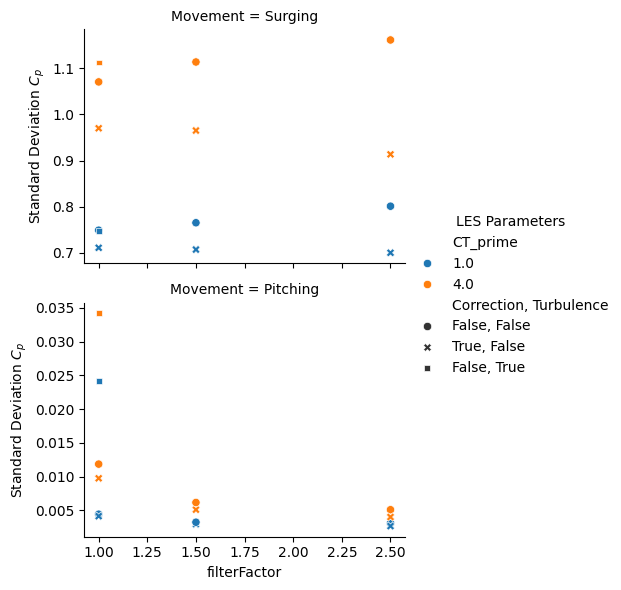

In [27]:
aspect = 1.5
g = sns.FacetGrid(df_les_vars, row = "Movement", sharey = False, aspect = aspect)
g.map_dataframe(sns.scatterplot, x = "filterFactor", y = "std_Cp", hue = "CT_prime", style = style, style_order = style_order, palette = palette)
g.set_ylabels("Standard Deviation $C_p$")
g.add_legend(title = "LES Parameters")

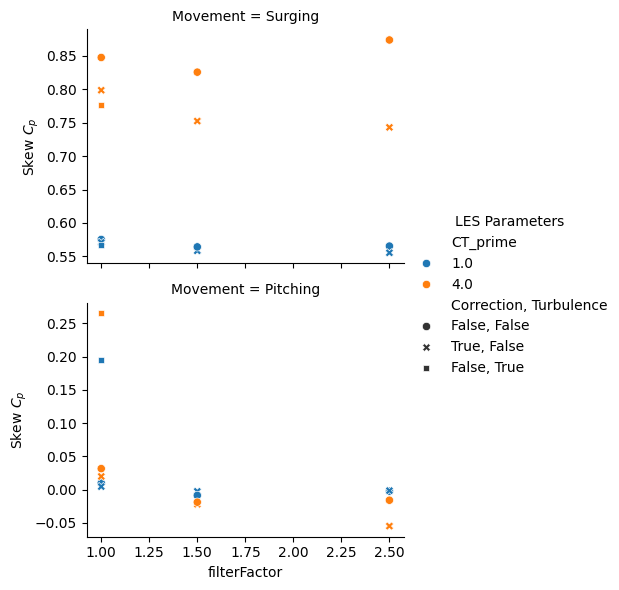

In [28]:
g = sns.FacetGrid(df_les_vars, row = "Movement", sharey = False, aspect = aspect)
g.map_dataframe(sns.scatterplot, x = "filterFactor", y = "skewness_Cp", hue = "CT_prime", style = style, style_order = style_order, palette = palette)
g.set_ylabels("Skew $C_p$")
g.add_legend(title = "LES Parameters")

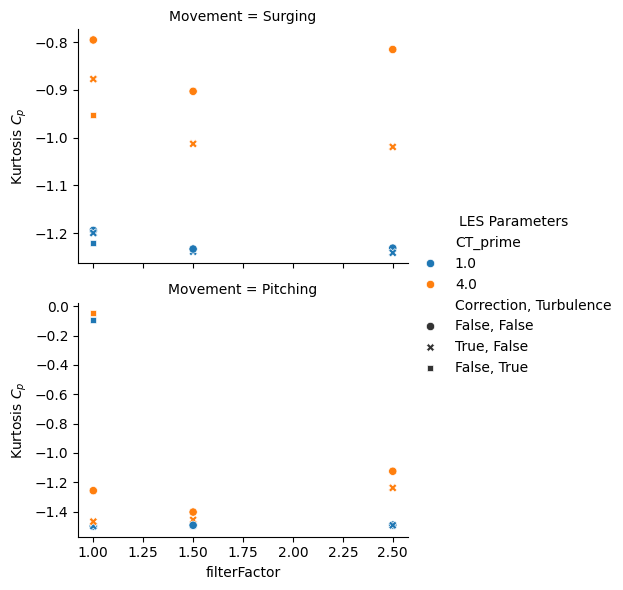

In [29]:
g = sns.FacetGrid(df_les_vars, row = "Movement", sharey = False, aspect = aspect)
g.map_dataframe(sns.scatterplot, x = "filterFactor", y = "kurtosis_Cp", hue = "CT_prime", style = style, style_order = style_order, palette = palette)
g.set_ylabels("Kurtosis $C_p$")
g.add_legend(title = "LES Parameters")

In [30]:
high_res_df

,Unnamed: 0,marker,nx,ny,filter,filterFactor,useCorrection,CT_prime,turbulence,mean_CT,...,skewness_CT,skewness_an,skewness_Cp,kurtosis_CT,kurtosis_an,kurtosis_Cp,Movement,Resolution (ny),h,f
2,2,o,256.0,128.0,0.147458,1.000,True,1.0,False,0.644266,...,-0.367102,0.367104,-0.367100,0.398371,0.398372,0.398369,Stationary,128.0,0.15,1.0
5,5,o,256.0,128.0,0.080000,0.543,True,1.0,False,0.645839,...,-0.076669,0.076674,-0.076664,-0.090234,-0.090232,-0.090235,Stationary,128.0,0.15,0.5
6,6,o,512.0,256.0,0.080000,1.085,True,1.0,False,0.641215,...,-0.015104,0.015112,-0.015096,-0.656862,-0.656858,-0.656866,Stationary,256.0,0.07,1.0
9,9,o,256.0,128.0,0.080000,0.543,False,1.0,False,0.656298,...,1.006623,-1.006613,1.006632,1.076518,1.076495,1.076541,Stationary,128.0,0.15,0.5
17,17,o,256.0,128.0,0.080000,0.543,True,4.0,False,1.075189,...,-0.457642,0.463409,-0.451880,-0.188750,-0.181547,-0.195865,Stationary,128.0,0.15,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,^,256.0,128.0,0.147458,1.000,True,4.0,False,1.080812,...,0.015113,-0.010504,0.019721,-1.468827,-1.468921,-1.468687,Pitching,128.0,0.15,1.0
114,114,^,256.0,128.0,0.221187,1.500,False,4.0,False,1.123330,...,-0.022114,0.025206,-0.019023,-1.403042,-1.402528,-1.403530,Pitching,128.0,0.15,1.5
115,115,^,256.0,128.0,0.368644,2.500,True,4.0,False,1.076953,...,-0.057736,0.060468,-0.055007,-1.237577,-1.236497,-1.238636,Pitching,128.0,0.15,2.5
116,116,s,320.0,128.0,0.135316,1.000,False,1.0,True,0.746364,...,0.315177,0.007151,0.566344,-1.430128,-1.497915,-1.221217,Surging,128.0,0.14,1.0


/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax0, data = df, x = an_key, y = CT_key, legend = True, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:6: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax1, data = df, x = "CT_prime", y = CT_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:7: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax2, data = df, x = an_key, y = Cp_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:8: UserWarning: 
The palette

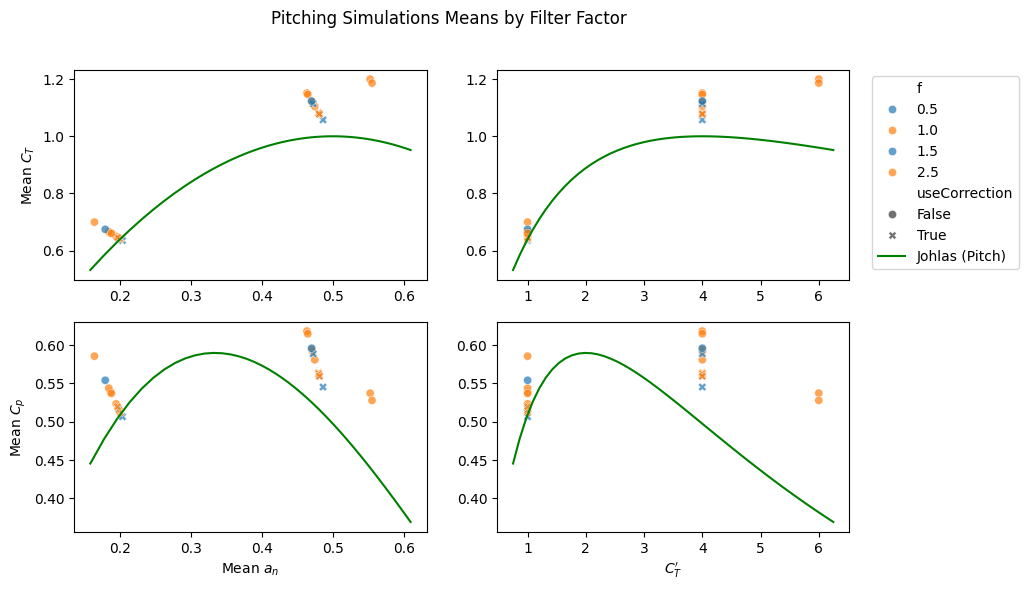

In [31]:
four_plot_layout(get_pitching(high_res_df), "mean_CT", "mean_an", "mean_Cp", title =  "Pitching Simulations Means by Filter Factor", ax_label_type = "Mean", hue = "f", style = "useCorrection", palette = palette, alpha = alpha, pitch = True);

/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax0, data = df, x = an_key, y = CT_key, legend = True, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:6: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax1, data = df, x = "CT_prime", y = CT_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:7: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax2, data = df, x = an_key, y = Cp_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:8: UserWarning: 
The palette

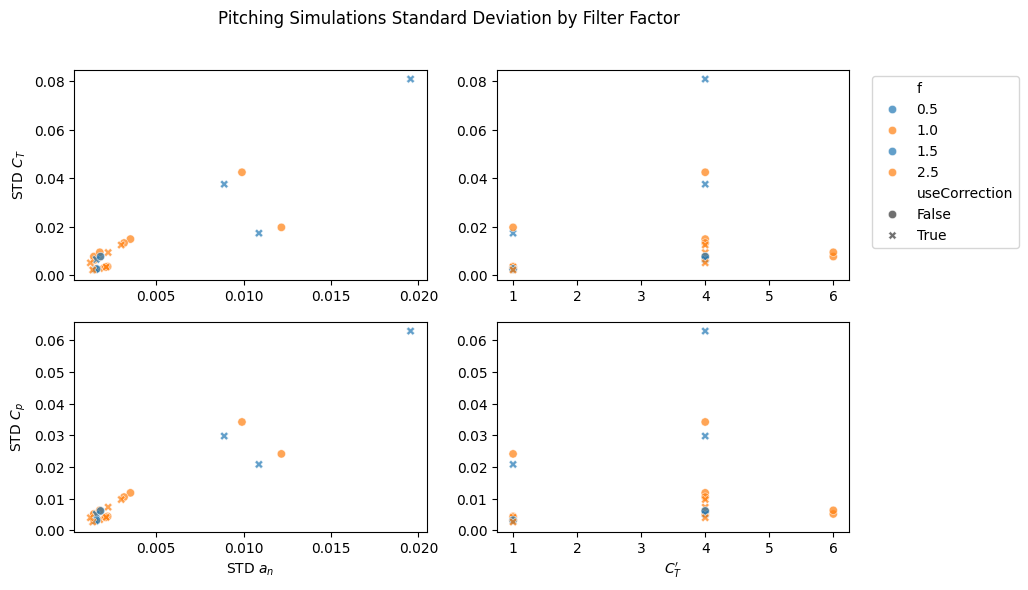

In [32]:
four_plot_layout(get_pitching(high_res_df), "std_CT", "std_an", "std_Cp", title =  "Pitching Simulations Standard Deviation by Filter Factor", ax_label_type = "STD", hue = "f", style = "useCorrection", palette = palette, alpha = alpha);

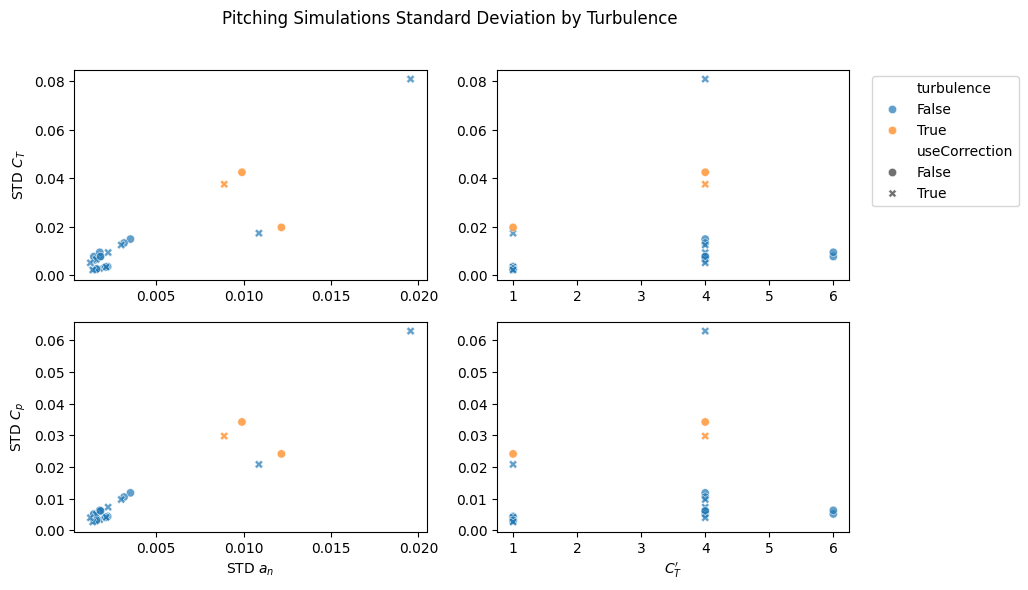

In [33]:
four_plot_layout(get_pitching(high_res_df), "std_CT", "std_an", "std_Cp", title =  "Pitching Simulations Standard Deviation by Turbulence", ax_label_type = "STD", hue = "turbulence", style = "useCorrection", palette = palette, alpha = alpha);

/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:5: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax0, data = df, x = an_key, y = CT_key, legend = True, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax1, data = df, x = "CT_prime", y = CT_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:7: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax2, data = df, x = an_key, y = Cp_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:8: UserWarning: 
The palette

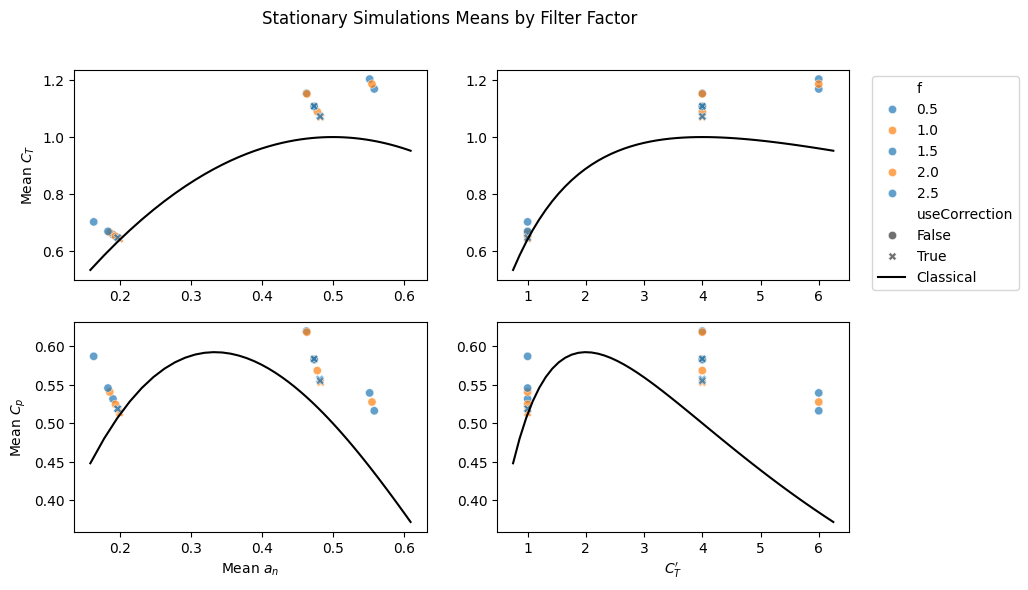

In [34]:
four_plot_layout(get_stationary(high_res_df), "mean_CT", "mean_an", "mean_Cp", title =  "Stationary Simulations Means by Filter Factor", ax_label_type = "Mean", hue = "f", style = "useCorrection", palette = palette, alpha = alpha, classical = True);

/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax0, data = df, x = an_key, y = CT_key, legend = True, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:6: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax1, data = df, x = "CT_prime", y = CT_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:7: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax2, data = df, x = an_key, y = Cp_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:8: UserWarning: 
The palette

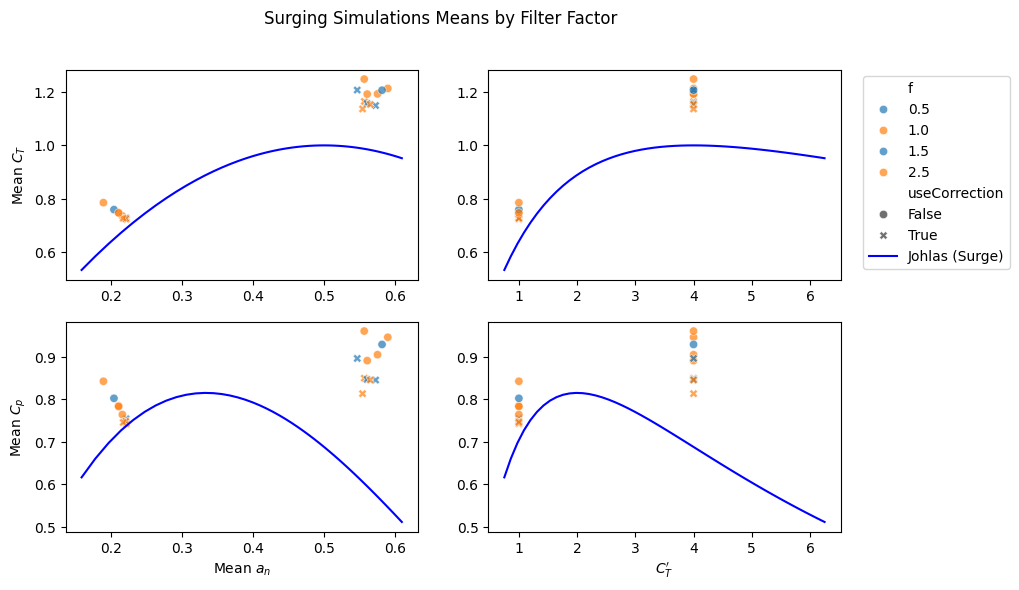

In [35]:
four_plot_layout(get_surging(high_res_df), "mean_CT", "mean_an", "mean_Cp", title =  "Surging Simulations Means by Filter Factor", ax_label_type = "Mean", hue = "f", style = "useCorrection", palette = palette, alpha = alpha, surge = True);

/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax0, data = df, x = an_key, y = CT_key, legend = True, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:6: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax1, data = df, x = "CT_prime", y = CT_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:7: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = ax2, data = df, x = an_key, y = Cp_key, legend = False, **kwargs)
/var/folders/dt/wzb0_01j5yz8q2y9bz5sfjm00000gn/T/ipykernel_1747/1011538909.py:8: UserWarning: 
The palette

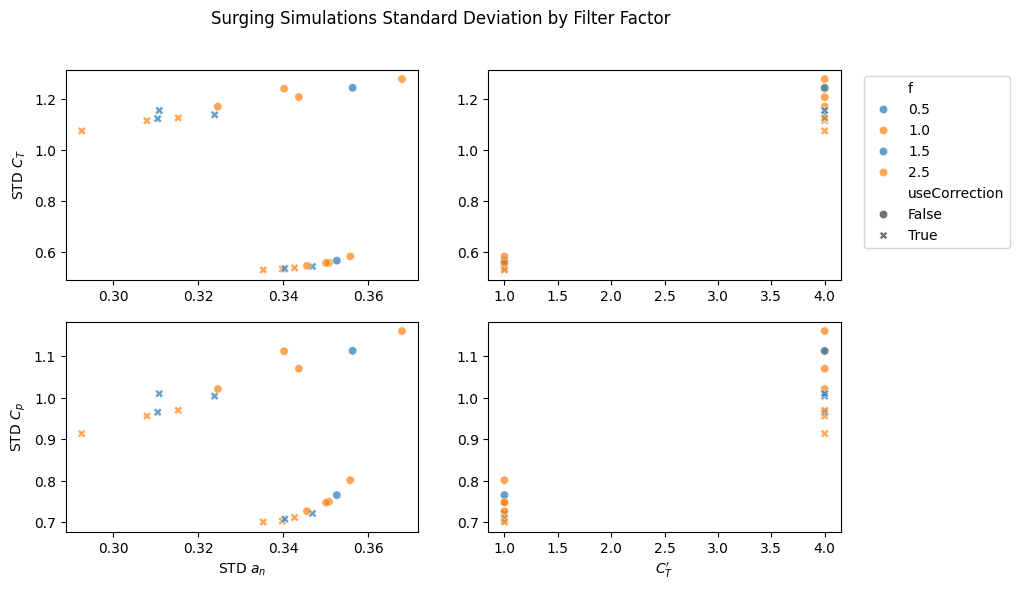

In [36]:
four_plot_layout(get_surging(high_res_df), "std_CT", "std_an", "std_Cp", title =  "Surging Simulations Standard Deviation by Filter Factor", ax_label_type = "STD", hue = "f", style = "useCorrection", palette = palette, alpha = alpha);

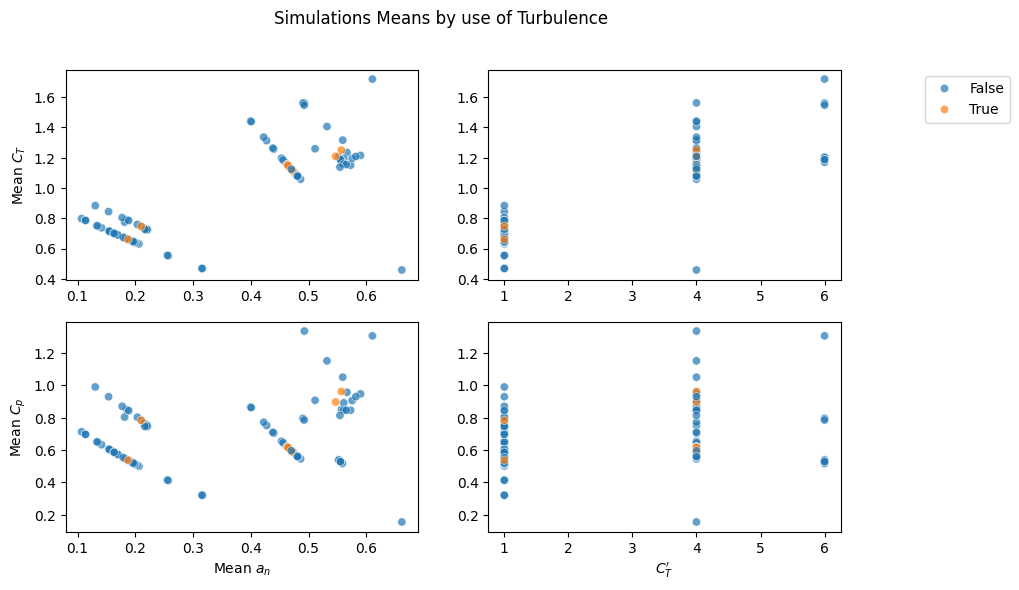

In [37]:
four_plot_layout(df, "mean_CT", "mean_an", "mean_Cp",  title = "Simulations Means by use of Turbulence", ax_label_type = "Mean", hue = "turbulence", palette = palette, alpha = alpha);

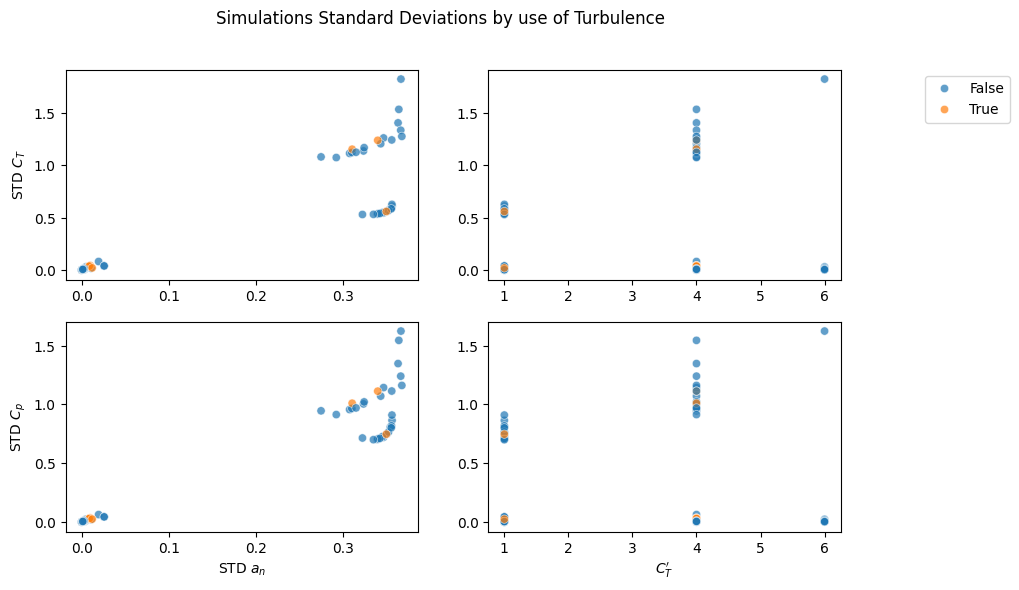

In [38]:
four_plot_layout(df, "std_CT", "std_an", "std_Cp",  title = "Simulations Standard Deviations by use of Turbulence", ax_label_type = "STD", hue = "turbulence", palette = palette, alpha = alpha);

/Users/sky/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/Users/sky/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/Users/sky/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)


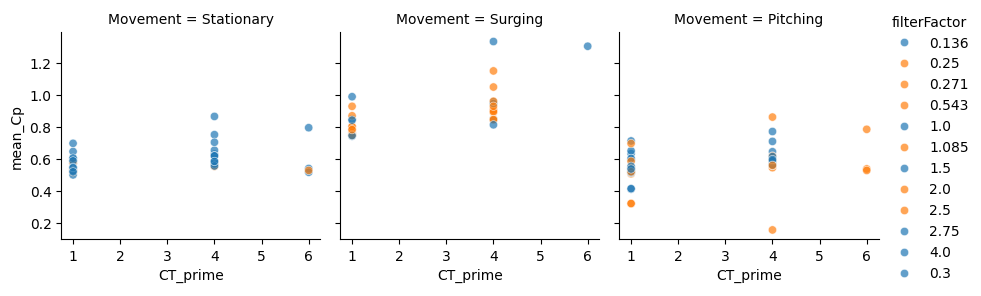

In [39]:
g = sns.FacetGrid(df, col = "Movement")
g.map_dataframe(sns.scatterplot, x = "CT_prime", y = "mean_Cp", hue = "filterFactor", palette = palette, alpha = alpha)
g.add_legend(title = "filterFactor")

This is pretty hard to interpret, so I want to try another formulation.

## Mean ($C_T' = 4.0$)

In [40]:
import seaborn as sns
cm = sns.color_palette("vlag", as_cmap=True)
all_indices = ["Movement", "Resolution (ny)", "filterFactor", "CT_prime", "useCorrection", "turbulence"]
movement_indices = ["Resolution (ny)", "filterFactor", "CT_prime", "useCorrection", "turbulence"]

In [41]:
df = df[(df["nx"] > 128) & (df["CT_prime"] < 6)]
df = df[(df["CT_prime"] == 4)]
df_ff1_cf = df[(df['filterFactor'] == 1.0) & (df['useCorrection'] == False)]
df_ff2_cf = df[(df['filterFactor'] == 2.5) & (df['useCorrection'] == False)]
df_ff3_ct = df[(df['filterFactor'] == 1.5) & (df['useCorrection'] == True)]
df = pd.concat([df_ff1_cf, df_ff2_cf, df_ff3_ct], axis = 0)

In [42]:
indexed_mean_df = mean_df.set_index(all_indices)
indexed_mean_df

f  \
Movement   Resolution (ny) filterFactor CT_prime useCorrection turbulence        
Stationary 32.0            1.000        1.0      True          False       1.0   
           128.0           1.000        1.0      True          False       1.0   
           32.0            0.136        1.0      True          False       0.1   
           64.0            0.271        1.0      True          False       0.2   
           128.0           0.543        1.0      True          False       0.5   
...                                                                        ...   
Pitching   128.0           1.000        4.0      True          False       1.0   
                           1.500        4.0      False         False       1.5   
                           2.500        4.0      True          False       2.5   
Surging    128.0           1.000        1.0      False         True        1.0   
Pitching   128.0           1.000        1.0      False         True        1.0   

                                                                            mean_CT  \
Movement   Resolution (ny) filterFactor CT_prime useCorrection turbulence             
Stationary 32.0            1.000        1.0      True          False       0.653387   
           128.0           1.000        1.0      True          False       0.644266   
           32.0            0.136        1.0      True          False       0.703096   
           64.0            0.271        1.0      True          False       0.688967   
           128.0           0.543        1.0      True          False       0.645839   
...                                                                             ...   
Pitching   128.0           1.000        4.0      True          False       1.080812   
                           1.500        4.0      False         False       1.123330   
                           2.500        4.0      True          False       1.076953   
Surging    128.0           1.000        1.0      False         True        0.746364   
Pitching   128.0           1.000        1.0      False         True        0.660187   

                                                                            mean_an  \
Movement   Resolution (ny) filterFactor CT_prime useCorrection turbulence             
Stationary 32.0            1.000        1.0      True          False       0.191677   
           128.0           1.000        1.0      True          False       0.197338   
           32.0            0.136        1.0      True          False       0.161492   
           64.0            0.271        1.0      True          False       0.169959   
           128.0           0.543        1.0      True          False       0.196359   
...                                                                             ...   
Pitching   128.0           1.000        4.0      True          False       0.480198   
                           1.500        4.0      False         False       0.470067   
                           2.500        4.0      True          False       0.481120   
Surging    128.0           1.000        1.0      False         True        0.210195   
Pitching   128.0           1.000        1.0      False         True        0.187572   

                                                                            mean_Cp  
Movement   Resolution (ny) filterFactor CT_prime useCorrection turbulence            
Stationary 32.0            1.000        1.0      True          False       0.528148  
           128.0           1.000        1.0      True          False       0.517128  
           32.0            0.136        1.0      True          False       0.589552  
           64.0            0.271        1.0      True          False       0.571871  
           128.0           0.543        1.0      True          False       0.519022  
...                                                                             ...  
Pitching   128.0           1.000        4.0      True     

In [43]:
stationary_df = mean_df[mean_df["Movement"] == "Stationary"]
stationary_df = stationary_df.set_index(movement_indices)
stationary_df.style.background_gradient(cmap=cm, subset = ["mean_Cp"])

,,,,,Movement,f,mean_CT,mean_an,mean_Cp
Resolution (ny),filterFactor,CT_prime,useCorrection,turbulence,,,,,
32.0,1.000000,1.000000,True,False,Stationary,1.000000,0.653387,0.191677,0.528148
128.0,1.000000,1.000000,True,False,Stationary,1.000000,0.644266,0.197338,0.517128
32.0,0.136000,1.000000,True,False,Stationary,0.100000,0.703096,0.161492,0.589552
64.0,0.271000,1.000000,True,False,Stationary,0.200000,0.688967,0.169959,0.571871
128.0,0.543000,1.000000,True,False,Stationary,0.500000,0.645839,0.196359,0.519022
256.0,1.085000,1.000000,True,False,Stationary,1.000000,0.641215,0.199241,0.513458
32.0,0.136000,1.000000,False,False,Stationary,0.100000,0.715554,0.154096,0.605290
64.0,0.271000,1.000000,False,False,Stationary,0.200000,0.701077,0.162697,0.587014
128.0,0.543000,1.000000,False,False,Stationary,0.500000,0.656298,0.189878,0.531682


In [44]:
surging_df = mean_df[mean_df["Movement"] == "Surging"]
surging_df = surging_df.set_index(movement_indices)
surging_df.style.background_gradient(cmap=cm, subset = ["mean_Cp"])

,,,,,Movement,f,mean_CT,mean_an,mean_Cp
Resolution (ny),filterFactor,CT_prime,useCorrection,turbulence,,,,,
32.0,0.136000,1.000000,True,False,Surging,0.100000,0.789476,0.185335,0.848608
64.0,0.271000,1.000000,True,False,Surging,0.200000,0.774081,0.181489,0.803083
128.0,0.543000,1.000000,True,False,Surging,0.500000,0.727722,0.220651,0.753893
256.0,1.085000,1.000000,True,False,Surging,1.000000,0.722296,0.220999,0.742238
32.0,0.136000,4.000000,True,False,Surging,0.100000,1.233068,0.566534,0.955945
64.0,0.271000,4.000000,True,False,Surging,0.200000,1.258191,0.511272,0.906406
128.0,0.543000,4.000000,True,False,Surging,0.500000,1.149785,0.572745,0.845141
256.0,1.085000,4.000000,True,False,Surging,1.000000,1.165021,0.556805,0.849453
32.0,1.000000,1.000000,False,False,Surging,1.000000,0.843260,0.153809,0.928690


In [45]:
pitching_df = mean_df[mean_df["Movement"] == "Pitching"]
pitching_df = pitching_df.set_index(movement_indices)
pitching_df.style.background_gradient(cmap=cm, subset = ["mean_Cp"])

## STD ($C_T' = 4.0$)

In [46]:
indexed_std_df = std_df.set_index(all_indices)
indexed_std_df.style.background_gradient(cmap=cm, subset = ["std_Cp"])

In [47]:
stationary_df = std_df[std_df["Movement"] == "Stationary"]
stationary_df = stationary_df.set_index(movement_indices)
stationary_df.style.background_gradient(cmap=cm, subset = ["std_Cp"])

,,,,,Movement,f,std_CT,std_an,std_Cp
Resolution (ny),filterFactor,CT_prime,useCorrection,turbulence,,,,,
32.0,1.000000,1.000000,True,False,Stationary,1.000000,0.000001,0.000001,0.000002
128.0,1.000000,1.000000,True,False,Stationary,1.000000,0.000001,0.000000,0.000001
32.0,0.136000,1.000000,True,False,Stationary,0.100000,0.000003,0.000002,0.000004
64.0,0.271000,1.000000,True,False,Stationary,0.200000,0.000016,0.000010,0.000020
128.0,0.543000,1.000000,True,False,Stationary,0.500000,0.000002,0.000001,0.000003
256.0,1.085000,1.000000,True,False,Stationary,1.000000,0.000005,0.000003,0.000006
32.0,0.136000,1.000000,False,False,Stationary,0.100000,0.000003,0.000002,0.000004
64.0,0.271000,1.000000,False,False,Stationary,0.200000,0.000030,0.000018,0.000038
128.0,0.543000,1.000000,False,False,Stationary,0.500000,0.000004,0.000003,0.000005


In [48]:
surging_df = std_df[std_df["Movement"] == "Surging"]
surging_df = surging_df.set_index(movement_indices)
surging_df.style.background_gradient(cmap=cm, subset = ["std_Cp"])

,,,,,Movement,f,std_CT,std_an,std_Cp
Resolution (ny),filterFactor,CT_prime,useCorrection,turbulence,,,,,
32.0,0.136000,1.000000,True,False,Surging,0.100000,0.586041,0.354679,0.806748
64.0,0.271000,1.000000,True,False,Surging,0.200000,0.530281,0.322678,0.714262
128.0,0.543000,1.000000,True,False,Surging,0.500000,0.545278,0.346897,0.720469
256.0,1.085000,1.000000,True,False,Surging,1.000000,0.534740,0.339784,0.701869
32.0,0.136000,4.000000,True,False,Surging,0.100000,1.261606,0.346950,1.142842
64.0,0.271000,4.000000,True,False,Surging,0.200000,1.080684,0.275123,0.945387
128.0,0.543000,4.000000,True,False,Surging,0.500000,1.137466,0.323882,1.004197
256.0,1.085000,4.000000,True,False,Surging,1.000000,1.114261,0.307951,0.956107
32.0,1.000000,1.000000,False,False,Surging,1.000000,0.609821,0.356680,0.863998


In [49]:
pitching_df = std_df[std_df["Movement"] == "Pitching"]
pitching_df = pitching_df.set_index(movement_indices)
pitching_df.style.background_gradient(cmap=cm, subset = ["std_Cp"])

## Skew ($C_T' = 4.0$)

In [50]:
indexed_skew_df = skew_df.set_index(all_indices)
indexed_skew_df.style.background_gradient(cmap=cm, subset = ["skewness_Cp"])

In [51]:
surging_df = skew_df[skew_df["Movement"] == "Surging"]
surging_df = surging_df.set_index(movement_indices)
surging_df.style.background_gradient(cmap=cm, subset = ["skewness_Cp"])

,,,,,Movement,f,skewness_CT,skewness_an,skewness_Cp
Resolution (ny),filterFactor,CT_prime,useCorrection,turbulence,,,,,
32.0,0.136000,1.000000,True,False,Surging,0.100000,0.325403,-0.010847,0.572326
64.0,0.271000,1.000000,True,False,Surging,0.200000,0.256671,0.028526,0.496492
128.0,0.543000,1.000000,True,False,Surging,0.500000,0.326449,0.019813,0.620851
256.0,1.085000,1.000000,True,False,Surging,1.000000,0.307960,0.007875,0.554279
32.0,0.136000,4.000000,True,False,Surging,0.100000,0.556274,-0.024103,0.837129
64.0,0.271000,4.000000,True,False,Surging,0.200000,0.365508,0.053436,0.690078
128.0,0.543000,4.000000,True,False,Surging,0.500000,0.616847,0.034303,1.078269
256.0,1.085000,4.000000,True,False,Surging,1.000000,0.449744,0.026680,0.727422
32.0,1.000000,1.000000,False,False,Surging,1.000000,0.302266,0.003856,0.545136


In [52]:
pitching_df = skew_df[skew_df["Movement"] == "Pitching"]
pitching_df = pitching_df.set_index(movement_indices)
pitching_df.style.background_gradient(cmap=cm, subset = ["skewness_Cp"])

## Kurtosis ($C_T' = 4.0$)

In [53]:
indexed_kurtosis_df = kurtosis_df.set_index(all_indices)
indexed_kurtosis_df.style.background_gradient(cmap=cm, subset = ["kurtosis_Cp"])

In [54]:
surging_df = kurtosis_df[kurtosis_df["Movement"] == "Surging"]
surging_df = surging_df.set_index(movement_indices)
surging_df.style.background_gradient(cmap=cm, subset = ["kurtosis_Cp"])

,,,,,Movement,f,kurtosis_CT,kurtosis_an,kurtosis_Cp
Resolution (ny),filterFactor,CT_prime,useCorrection,turbulence,,,,,
32.0,0.136000,1.000000,True,False,Surging,0.100000,-1.425101,-1.500085,-1.220729
64.0,0.271000,1.000000,True,False,Surging,0.200000,-1.452713,-1.510384,-1.274576
128.0,0.543000,1.000000,True,False,Surging,0.500000,-1.345051,-1.479269,-1.030993
256.0,1.085000,1.000000,True,False,Surging,1.000000,-1.438941,-1.500229,-1.245308
32.0,0.136000,4.000000,True,False,Surging,0.100000,-1.266905,-1.498765,-0.873642
64.0,0.271000,4.000000,True,False,Surging,0.200000,-1.334062,-1.502642,-0.967983
128.0,0.543000,4.000000,True,False,Surging,0.500000,-0.900685,-1.431145,0.030037
256.0,1.085000,4.000000,True,False,Surging,1.000000,-1.371291,-1.502929,-1.051093
32.0,1.000000,1.000000,False,False,Surging,1.000000,-1.438759,-1.499883,-1.250723


In [55]:
pitching_df = kurtosis_df[kurtosis_df["Movement"] == "Pitching"]
pitching_df = pitching_df.set_index(movement_indices)
pitching_df.style.background_gradient(cmap=cm, subset = ["kurtosis_Cp"])